In [548]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, plot_importance,cv
import xgboost as xgb

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")


In [549]:
app_train=pd.read_csv('application_train.csv')
app_test=pd.read_csv('application_test.csv')

In [550]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [551]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

<Axes: xlabel='TARGET', ylabel='count'>

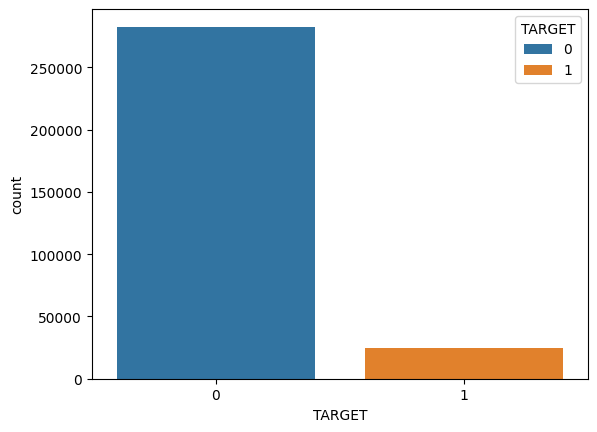

In [552]:
#check class imbalance, most of the data are for target=0(denied)
#the biases can be addressed by applying class weights during training or re-sampling before training  
sns.countplot(app_train,x='TARGET',hue='TARGET')

In [553]:

def computenull(data:pd.DataFrame)->pd.DataFrame:
    percentage=data.isna().sum()/len(data)
    count=data.isna().sum()
    nulllist=pd.concat([percentage,count],axis=1,\
    keys=['missing_percent','missing_count']).sort_values(by=['missing_count'],ascending=True)
    #nulllist=nulllist[nulllist['missing_percent']==0]
    return nulllist

nulllist=computenull(app_train)

print(f"{len(nulllist[nulllist['missing_percent']>0])/len(nulllist)*100:.2f} % of columns "\
    "have missing values.")


54.92 % of columns have missing values.


In [554]:
#columns wiht highest null value percentages
nulllist.sort_values(by='missing_percent',ascending=False).head()

,missing_percent,missing_count
COMMONAREA_MEDI,0.698723,214865
COMMONAREA_AVG,0.698723,214865
COMMONAREA_MODE,0.698723,214865
NONLIVINGAPARTMENTS_MODE,0.694330,213514
NONLIVINGAPARTMENTS_MEDI,0.694330,213514


In [555]:
#columns_to_exclude=nulllist[nulllist['missing_percent']>0.3].index.tolist()

#app_train=app_train.drop(columns=columns_to_exclude)
#this seperate our columns into categorical and numerical types
cat_cols = [cols for cols in app_train.columns if app_train[cols].dtype == 'object']
num_cols = [cols for cols in app_train.columns if app_train[cols].dtype !='object' and cols not in ['TARGET','SK_ID_CURR']]


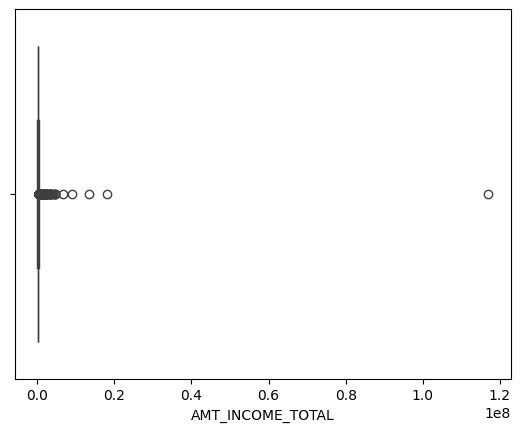

In [556]:
# we see some extreme outliers on the right side of the graph, we will remove them to allow better generalization 
sns.boxplot(x=app_train['AMT_INCOME_TOTAL'])
plt.show()


In [557]:
# all income greater than 15 times of the mean will be removed 
app_train=app_train[app_train.AMT_INCOME_TOTAL <app_train.AMT_INCOME_TOTAL.mean()*15]

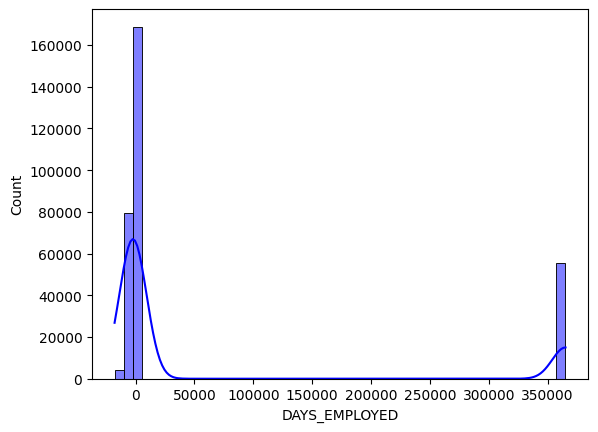

In [558]:
#this does not look right, days employed are mostly negative but we do have a portion of applicants with daysof employee>350,000 days 
# this is mostly wrong format on the date, we will convert them to 0
sns.histplot(app_train['DAYS_EMPLOYED'], bins=50, kde=True, color='blue')
#sns.boxplot(x=app_train['DAYS_EMPLOYED'])
plt.show()


<Axes: xlabel='DAYS_EMPLOYED'>

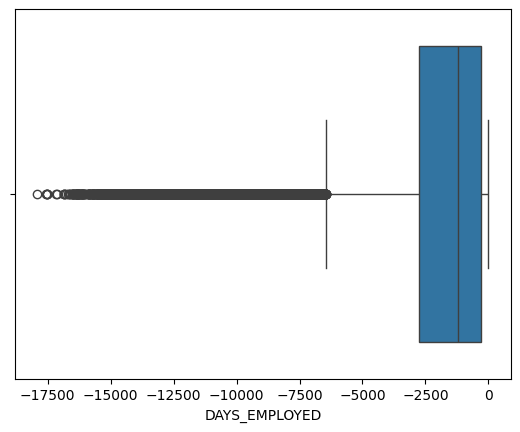

In [559]:
#people with positive days employed are now reset to 0, negative employed days means that the applicant is currently employed, 0 means not employed 

app_train['DAYS_EMPLOYED'].loc[app_train['DAYS_EMPLOYED']>350000]=0
sns.boxplot(x=app_train['DAYS_EMPLOYED'])

# this looks about right, majority of applicant fell into -2500 to ~0 days , and we do see some outliers, ~-17500 days wow that is about 50 years 

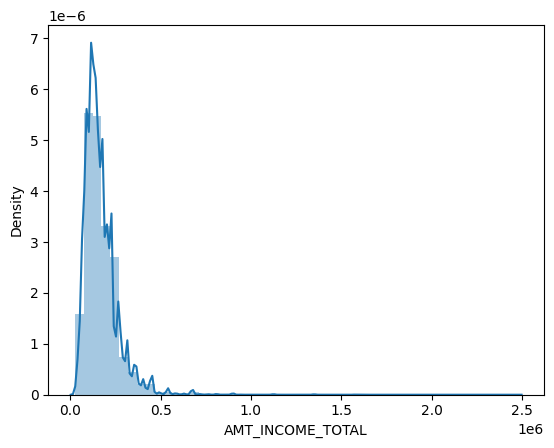

In [560]:
#income distribution, although some outliers still exist but the distribution is less skewed 
sns.distplot(app_train['AMT_INCOME_TOTAL'])
plt.show()


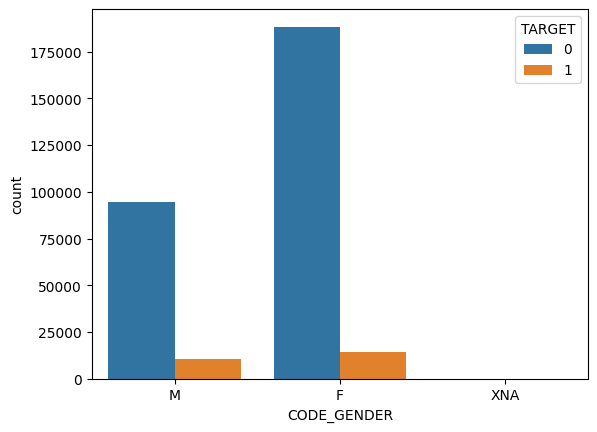

In [561]:
#  Female applicants outnumber Male applicants, but what is XNA ? 
sns.countplot(app_train,x='CODE_GENDER',hue='TARGET')
plt.show()



In [562]:
print(f"{(len(app_train[app_train['CODE_GENDER']=='XNA'])/len(app_train) *100):.5f}  % of records have XNA as gender") 

0.00130  % of records have XNA as gender


In [563]:
# we will simply remove rows with gender xna since this is a smalle percentage
# we can also use data from other columns to predict and fill this value 
app_train=app_train[app_train['CODE_GENDER']!='XNA']


In [564]:
print(app_train.NAME_TYPE_SUITE.unique())

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']


In [565]:
# this replace any null values on name-type-suite to the most frequency appeared value of this column
app_train.NAME_TYPE_SUITE.fillna(app_train.NAME_TYPE_SUITE.mode()[0],inplace=True)


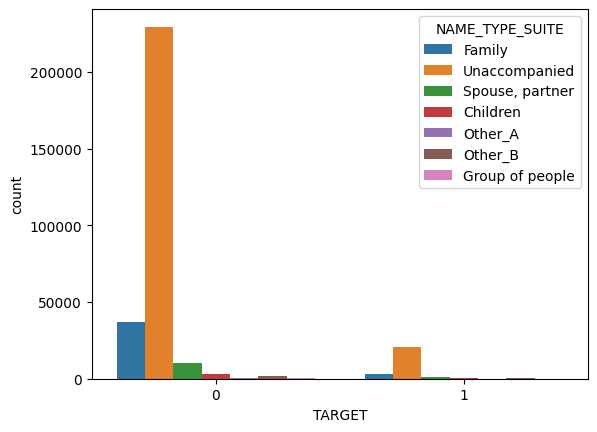

In [566]:
#this might not be accurate but lets see what is the % of applicants are unaccompanied in each default and not default group  
sns.countplot(app_train,x='TARGET',hue='NAME_TYPE_SUITE')
plt.show()

In [567]:
#higher % of defaulted applicants are actully unaaccompanied, we  have to look at the percantage counts of the group 
app_train.groupby('TARGET')['NAME_TYPE_SUITE'].value_counts(normalize=True)

TARGET  NAME_TYPE_SUITE
0       Unaccompanied      0.811530
        Family             0.131389
        Spouse, partner    0.037058
        Children           0.010705
        Other_B            0.005646
        Other_A            0.002795
        Group of people    0.000877
1       Unaccompanied      0.822020
        Family             0.121218
        Spouse, partner    0.036055
        Children           0.009709
        Other_B            0.007010
        Other_A            0.003062
        Group of people    0.000927
Name: proportion, dtype: float64

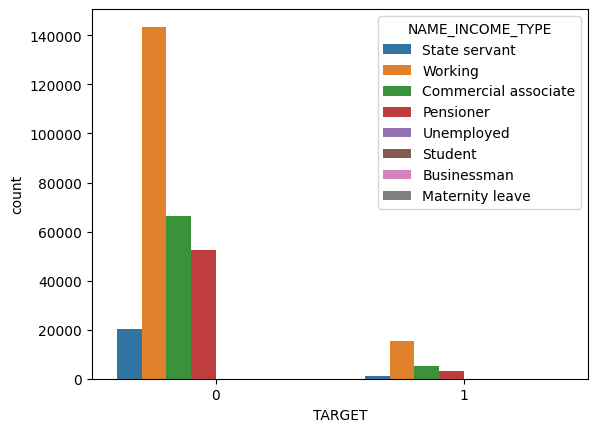

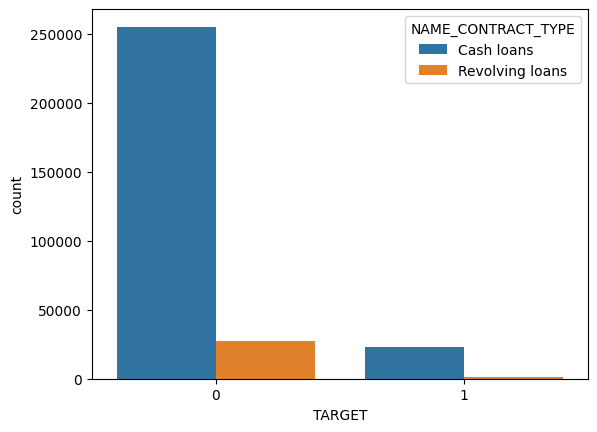

In [568]:
# most applicants are working class and commericial associate and pensioners are next 
sns.countplot(app_train,x='TARGET',hue='NAME_INCOME_TYPE')
plt.show()
#cash loans are majority of all loans
sns.countplot(app_train,x='TARGET',hue='NAME_CONTRACT_TYPE')
plt.show()


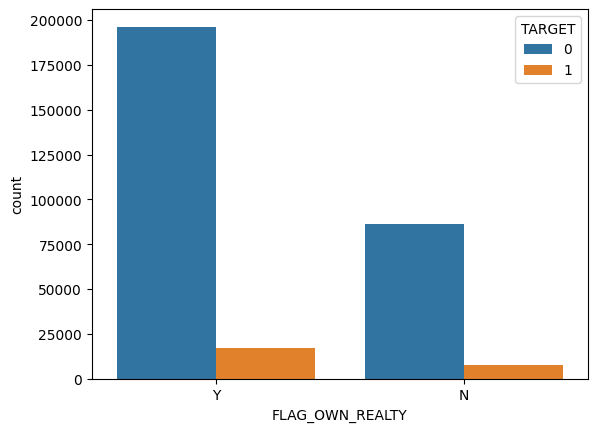

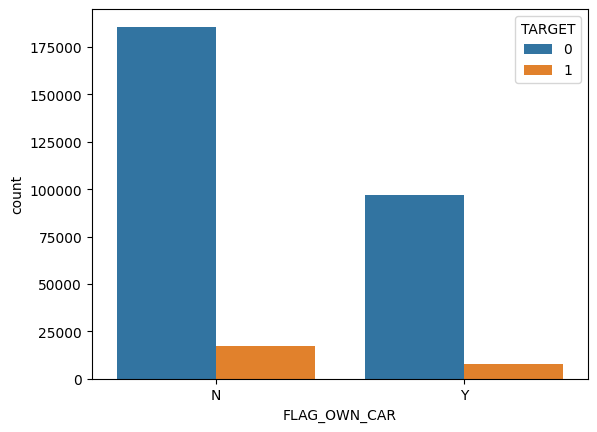

In [569]:
#shows whether the applicants are getting a loan to own real estate properties or cars, more loans are used to buy real estate properties  
sns.countplot(app_train,x='FLAG_OWN_REALTY',hue='TARGET')
plt.show()
sns.countplot(app_train,x='FLAG_OWN_CAR',hue='TARGET')
plt.show()



In [570]:
target1=app_train[app_train.TARGET==1]
target0=app_train[app_train.TARGET==0]
target0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash l

In [571]:
# this function 
def feature_comp(features:list,target1:pd.DataFrame,target0:pd.DataFrame):
    for feature in features:
        plt.figure()
        sns.kdeplot(target1[feature], label='Defaulted')
        sns.kdeplot(target0[feature], label='Not Defaulted')
        plt.legend()
    plt.show()


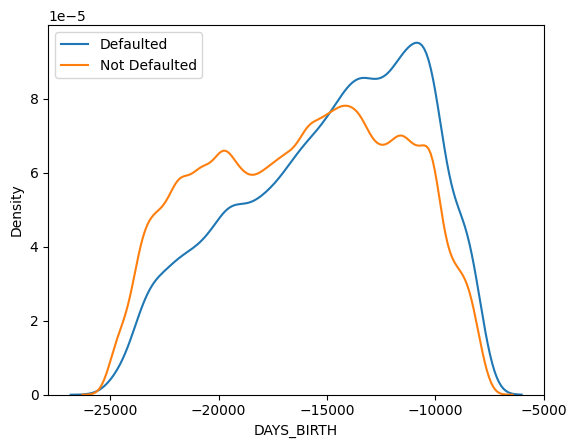

In [572]:
feature_comp(['DAYS_BIRTH'],target1,target0)

# we can see how younger people group has higher distribution of risk based on the density graph


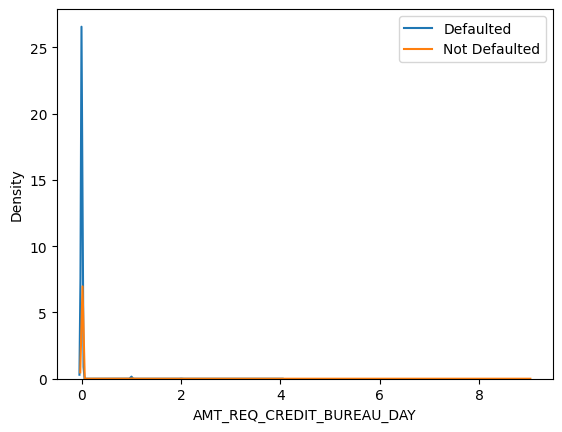

In [573]:
#default people have higher 
feature_comp(['AMT_REQ_CREDIT_BUREAU_DAY'],target1,target0)


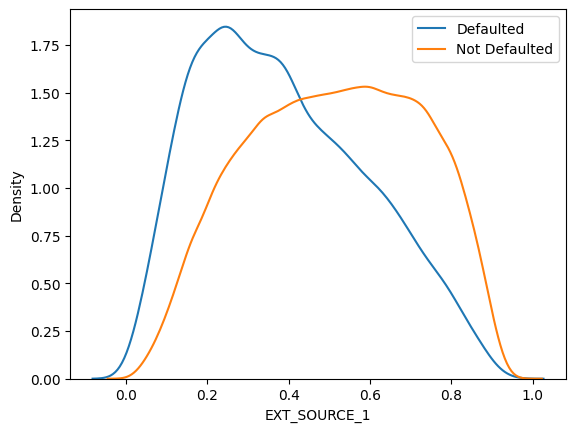

In [574]:
feature_comp(['EXT_SOURCE_1'],target1,target0)


<Axes: xlabel='TARGET', ylabel='NAME_HOUSING_TYPE'>

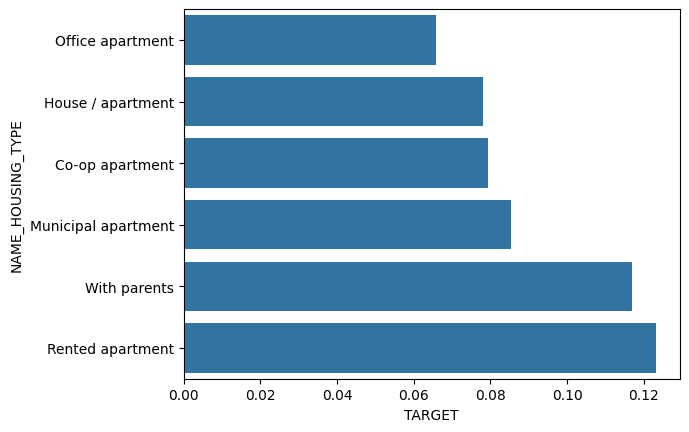

In [575]:

# group by current housing price and take the average of target column - this calculate the default rate in each category
cat_perc = app_train[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by='TARGET')

sns.barplot( y = 'NAME_HOUSING_TYPE', x='TARGET', order=cat_perc['NAME_HOUSING_TYPE'], data=cat_perc)
# people who live in a rented apartments has the highest default rate


In [576]:
#package the above cell into a function, this will take a column name and return the default rate for each category in that column
def graph_percategory_default_rate(type:str):
    cat_perc = app_train[[type, 'TARGET']].groupby([type],as_index=False).mean().sort_values(by='TARGET')

    sns.barplot( y = type, x='TARGET', order=cat_perc[type], data=cat_perc)

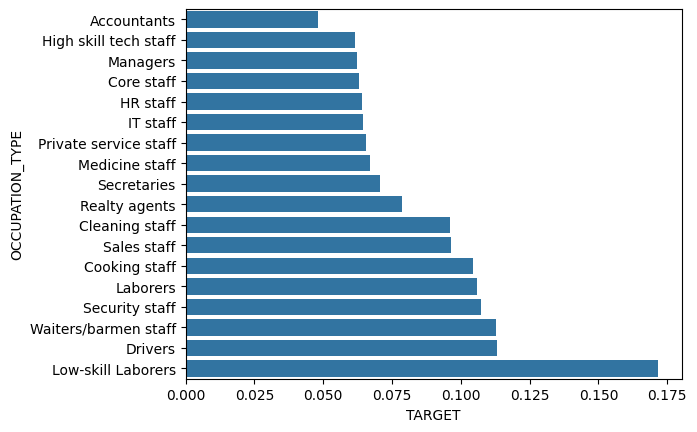

In [577]:

#low-skill laborers have the highest rate of default, and accountants have the lowest rate of default- huhh I wonder why 
graph_percategory_default_rate('OCCUPATION_TYPE')

In [ ]:
columns_to_exclude=nulllist[nulllist['missing_percent']>0.3].index.tolist() 
all_columns=[cols for cols in app_train.columns if cols not in columns_to_exclude and cols not in ['TARGET','SK_ID_CURR']]

cat_cols = [cols for cols in all_columns if app_train[cols].dtype == 'object']
num_cols = [cols for cols in all_columns if app_train[cols].dtype !='object' ]



In [ ]:
from sklearn.preprocessing import FunctionTransformer
# creating new features
def add_debt_ratio_and_sum(df):
   
    df['Annuitytoincome_ratio'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['Credittoincome_ratio'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    df['Debt_Time'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    df.loc[df['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED']=0
    df['Score'] = df['EXT_SOURCE_1'] + df['EXT_SOURCE_2']+ df['EXT_SOURCE_3']
    df['Scoreproduct'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2']* df['EXT_SOURCE_3']


    return df
debt_ratio_transformer = FunctionTransformer(add_debt_ratio_and_sum, validate=False)

#transformation for cat columns  
cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


#transformation for numerical columns

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), 
           ("scaler", StandardScaler())]
)
addedcolumn=['Annuitytoincome_ratio','Credittoincome_ratio','Debt_Time','Score','Scoreproduct']

#adding sklearn pipeline steps
preprocessor = Pipeline(
    steps=[
    ('add_debt', debt_ratio_transformer),

        ('process', ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, num_cols +addedcolumn ),  # Process numeric features
                ('cat_high', cat_transformer, cat_cols),
               
                 # Process categorical features
            ]
        ))
          # Apply debt_ratio transformer first
    ]
)


In [580]:

from sklearn.model_selection import train_test_split
#split sample

train, test = train_test_split(app_train, test_size=0.2,random_state=42, shuffle=True)
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)



train_x,train_y=oversampler.fit_resample(train.drop(columns=['TARGET']), train.TARGET)
# fit the training data through transformation pipeline
train_x=preprocessor.fit_transform(train_x)
test_x,test_y =test.drop(columns=['TARGET']),test['TARGET']
#transform testing data 
test_x=preprocessor.transform(test_x)


In [581]:
#convert to matrix

dtrain,dtest=xgb.DMatrix(train_x,label=train_y),xgb.DMatrix(test_x,label=test_y),

In [582]:
#setting up parameters for XGB model 
params = {
    'objective':'binary:logistic',
    'eval_metric':['auc'],
   'subsample': 0.5,
     'min_child_weight': 2, 
     'max_depth': 8,
     'learning_rate': 0.3,
       'lambda': 1, 
       'gamma': 0.4,
         'colsample_bytree': 0.8, 
         'alpha': 2
}

trained_model=xgb.train(params,dtrain,num_boost_round=500,evals=[(dtrain, 'train'), (dtest, 'test')], 
    early_stopping_rounds=20,  
    verbose_eval=True)

[0]	train-auc:0.72560	test-auc:0.69007
[1]	train-auc:0.74445	test-auc:0.70218
[2]	train-auc:0.76909	test-auc:0.71948
[3]	train-auc:0.77937	test-auc:0.72610
[4]	train-auc:0.78586	test-auc:0.72819
[5]	train-auc:0.79174	test-auc:0.73111
[6]	train-auc:0.79712	test-auc:0.73246
[7]	train-auc:0.80146	test-auc:0.73383
[8]	train-auc:0.80551	test-auc:0.73472
[9]	train-auc:0.81128	test-auc:0.73533
[10]	train-auc:0.81757	test-auc:0.73988
[11]	train-auc:0.82176	test-auc:0.74043
[12]	train-auc:0.82466	test-auc:0.74117
[13]	train-auc:0.82627	test-auc:0.74154
[14]	train-auc:0.82958	test-auc:0.74198
[15]	train-auc:0.83346	test-auc:0.74190
[16]	train-auc:0.83518	test-auc:0.74228
[17]	train-auc:0.83783	test-auc:0.74232
[18]	train-auc:0.84179	test-auc:0.74323
[19]	train-auc:0.84290	test-auc:0.74351
[20]	train-auc:0.84464	test-auc:0.74358
[21]	train-auc:0.84760	test-auc:0.74350
[22]	train-auc:0.84998	test-auc:0.74368
[23]	train-auc:0.85294	test-auc:0.74339
[24]	train-auc:0.85531	test-auc:0.74329
[25]	train

In [583]:
y_pred_prob=trained_model.predict(dtest)

y_pred = (y_pred_prob > 0.64).astype(int)

# Confusion matrix
cm = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(cm)


auc_score = roc_auc_score(test_y, y_pred_prob)
print(f"AUC: {auc_score:.4f}")

recall = recall_score(test_y, y_pred)
print(f"Recall: {recall:.4f}")

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(test_y, y_pred)
print(f"Precision: {precision:.4f}")


Confusion Matrix:
[[49964  6618]
 [ 2970  1946]]
AUC: 0.7420
Recall: 0.3959
Accuracy: 0.8441
Precision: 0.2272
